# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\pizza\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


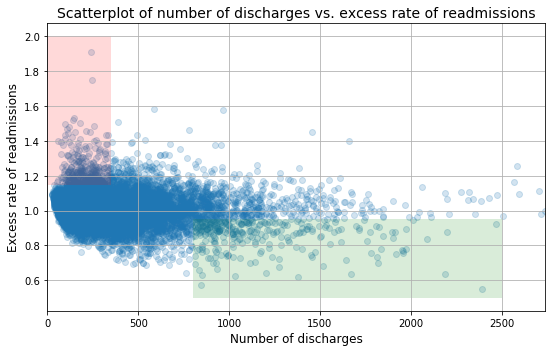

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [36]:
df = clean_hospital_read_df
#df.head()
df = df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
df['Number of Discharges'] = df['Number of Discharges'].astype('int64')
df.reset_index(drop=True)
df.describe()
#df.info()

,Number of Discharges,Excess Readmission Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


In [47]:
# smaller hospitals: fewer than 100 discharges

hospital_small = df[df['Number of Discharges']<100]
hosp_stats_s = hospital_small.describe()

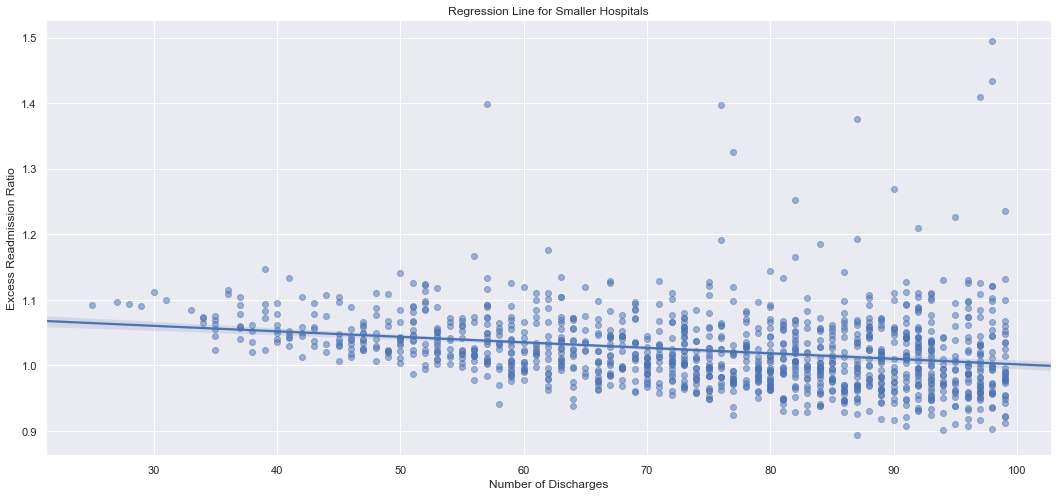

In [77]:
# number of discharges v. rate of readmission for smaller hospitals
sns.set(rc={'figure.figsize':(18,8)})
ax = sns.regplot(x='Number of Discharges', y='Excess Readmission Ratio', data=hospital_small, scatter_kws={'alpha':0.5})
ax.set_title('Regression Line for Smaller Hospitals');


In [70]:
# larger hospitals: greater than 1000 discharges
hospital_large = df[df['Number of Discharges']>1000]
hosp_stats_l = hospital_large.describe()

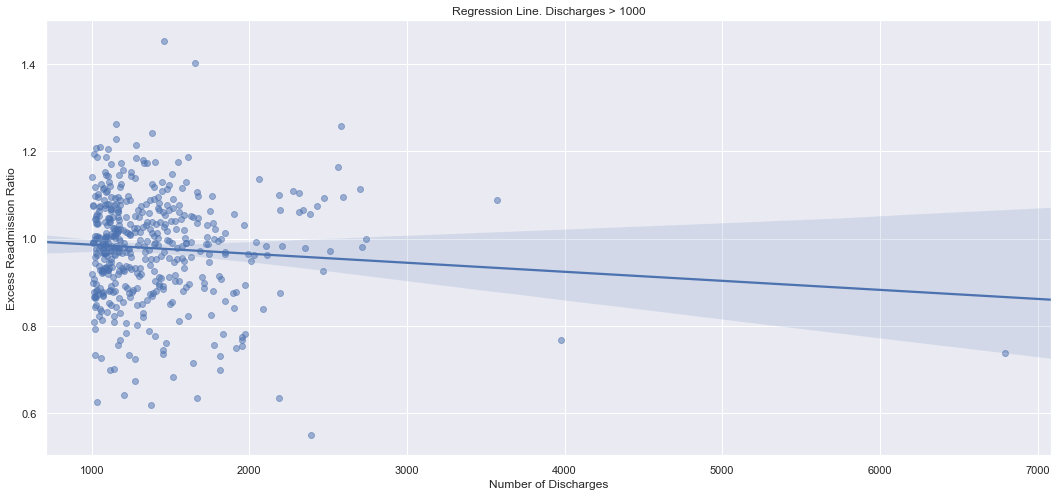

In [78]:
# number of discharges v. rate of readmission for larger hospitals

ax = sns.regplot(x='Number of Discharges', y='Excess Readmission Ratio', data=hospital_large, scatter_kws={'alpha':0.5})
ax.set_title('Regression Line. Discharges > 1000');

In [72]:
# diff of means for small and large hospitals
mean_diff = hosp_stats_s.loc['mean'][1] - hosp_stats_l.loc['mean'][1]

# diff of truncated means
t_mean_s = stats.trim_mean(hospital_small['Excess Readmission Ratio'], 0.05)
t_mean_l = stats.trim_mean(hospital_large['Excess Readmission Ratio'], 0.05)

t_mean_diff = t_mean_s - t_mean_l
t_mean_diff
print(t_mean_s)
print(t_mean_l)

1.019378598130841
0.9806880095923262


### A. Do you agree with the above analysis and recommendations? Why or why not?

I do not wholly agree with the preliminary analysis and recommendations.
The preliminary conclusions emphasize a need for smaller facilities to upgrade resources and to consolidate smaller facilites into larger operations. These recommendations do not take into account that the data has a larger spread for smaller facilities which make it more susceptible to outliers affecting the readmission rate.

### B. 1. Hypothesis
H_0: There is not a staticially significant correlation between the number of discharges and the readmission rate for a hospital.

H_A: There is a statistically significant correlation between the number of discharges and the readmission rate for a hospital.

### B. 2. p-value
### 3. Statistical signifigance for alpha = 0.01

The null hypothesis should be rejected since the p-value is very close to zero at 1.22e-25.
The Pearson coefficient of -0.097 does indicate a slightly inverse correlation between the size of the hospital and how many excess readmissions it experiences.

In [65]:
# Calculate the Pearson coefficient

r = np.corrcoef(df['Number of Discharges'], df['Excess Readmission Ratio'])[0][1]

n = len(df['Number of Discharges'])
t_stat = r * np.sqrt(n-2)/np.sqrt(1-r**2)
p_value = stats.t.cdf(x=t_stat, df = n-2) * 2

print('r: \t {:0.5}\nt-statistic: \t {:0.5}\np-value: \t {:0.5}'.format(r, t_stat, p_value))

r: 	 -0.097398
t-statistic: 	 -10.492
p-value: 	 1.2225e-25


### B. 4. Statistical signifigance vs. practical signifigance

I do believe that there is a difference between statisical and practial significance in this case. As mentioned earlier, the original recommendation to consolidate smaller facilities into larger ones requires more investigation into whether readmission is caused by lower quality care experienced at smaller hospitals. The cost to operate larger hospitals also needs to be considered when thinking of practical signifigance.

### B. 5. Scatterplot

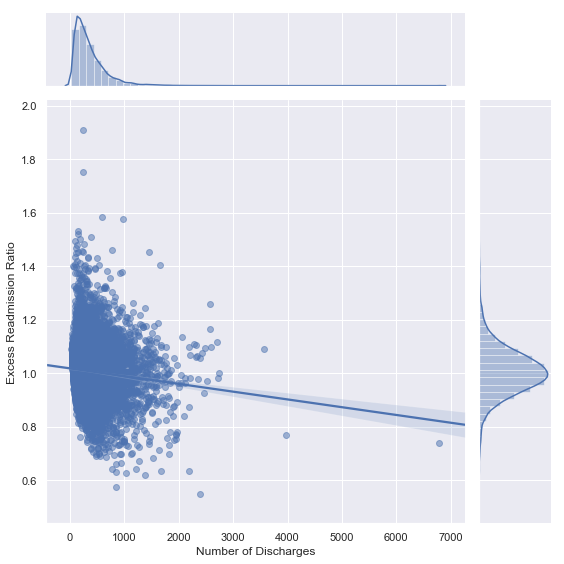

In [79]:
g = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind = 'reg', height= 8, scatter_kws = {'alpha' : 0.5})

The scatterplot included in the preliminary analysis is conveninent for displaying a general feel for the spread of the data. One major disadvantage is that despite having the transparency of the plotted points set to alpha=0.15, it is still very difficult to visually interpret the density of the data points when they are overlapped.
As an alternative visualization, the jointplot above can be used. This jointplot includes a linear regression line and density plots. It also has the convenience of being a quick plotting method included in Seaborn.